In [5]:
# importing libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

In [6]:
file = pd.read_csv("/home/khyati/Downloads/Batch06/Batch06.csv") #reading the file
import numpy as np
df = pd.DataFrame(file)
outlier = []
count = 0
for i in df.columns:
    count = 0
    lq = df[i].quantile(.25)
    hq = df[i].quantile(.75)
    IQR = hq-lq
    md = df[i].mean()
    if(i != "Class"):
        for j in range(len(df[i])):
            if(df[i][j] < lq - 1.5*IQR or df[i][j] > hq + 1.5*IQR):
                df[i][j] = md
                count += 1
    outlier.append(count)               # Making multiple dataframe for different types of 
dfpca = df            # data (eg: original, pca, standard, normalised ,etc)
cl = df['Class']

dfmm = df
dfstd = df

df_fs = df[['SEX','AGEGRP','REGION','REFILL_COUNT','ADMTYP','Total Knee Arthrolplasty','TOTAL HIP ANTHROPLASTY','Medicine','Class']]
# feature selection : eliminating redundant columns
#Eliminating Redundant Columns i.e Columns having high value of Corelation coefficient between each other
#(corr > 0.5)


minmax = MinMaxScaler() # normalised
stand = StandardScaler() # standardised
dfmm = minmax.fit_transform(dfmm.drop(columns = ['Class'])) # normalised
dfstd = stand.fit_transform(dfstd.drop(columns=['Class'])) # standardised
dfmm = pd.DataFrame(dfmm) 
dfstd = pd.DataFrame(dfstd)
dfmm = dfmm.join(cl)  # joining the class column back into standard  or normalised data
dfstd = dfstd.join(cl)

# pca = PCA(n_components=2)  # PCA 
# dfpca = pca.fit_transform(dfpca.drop(columns = ['Class']))
# dfpca = pd.DataFrame(dfpca)
# dfpca = dfpca.join(cl)  # joining the class column back

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [7]:
def GMM(df):  # function for GMM and Bayesian . Bayesian is for Q = 1
    temp = df["Class"]
    df = df.drop(columns = ["Class"])
   
    x_train, x_test, y_train, y_test = train_test_split(df,temp,test_size = 0.3,random_state = 42, shuffle=False)
   
    train = x_train.assign(Class = y_train)
   
    train_1 = train[train["Class"] == 1].drop(columns = ["Class"])
    train_2 = train[train["Class"] == 2].drop(columns = ["Class"])
   
    i = 1
    Q = [1,2,3,4,5,6]
    acc = []
    while (2*i <= 12):
        gmm_1 = GaussianMixture(n_components = i)
        gmm_1.fit(train_1)
       
        gmm_2 = GaussianMixture(n_components = i)
        gmm_2.fit(train_2)
   
        score_1 = gmm_1.score_samples(x_test)
        score_2 = gmm_2.score_samples(x_test)
   
   
        y_pred = []
        for j in range(len(x_test)):
            if(score_1[j] >= score_2[j]):
                y_pred.append(1)
            else:
                y_pred.append(2)
        acc.append(accuracy_score(y_test,y_pred))
        print("Q:",i,"Accuracy:",accuracy_score(y_test,y_pred))
        print(confusion_matrix(y_test,y_pred))
        i += 1
    plt.plot(Q,acc)
    plt.show()
    return np.around(acc,decimals = 4)

In [8]:
def GMM1(df,n):  # function for GMM and Bayesian . Bayesian is for Q = 1
    temp = df["Class"]
    df = df.drop(columns = ["Class"])
   
    x_train, x_test, y_train, y_test = train_test_split(df,temp,test_size = 0.3,random_state = 42, shuffle=False)
   
    train = x_train.assign(Class = y_train)
   
    train_1 = train[train["Class"] == 1].drop(columns = ["Class"])
    train_2 = train[train["Class"] == 2].drop(columns = ["Class"])
    acc = []
    gmm_1 = GaussianMixture(n_components = n)
    gmm_1.fit(train_1)
       
    gmm_2 = GaussianMixture(n_components = n)
    gmm_2.fit(train_2)
    
    score_1 = gmm_1.score_samples(x_test)
    score_2 = gmm_2.score_samples(x_test)
   
   
    y_pred = []
    for j in range(len(x_test)):
       if(score_1[j] >= score_2[j]):
            y_pred.append(1)
       else:
            y_pred.append(2)
    acc = accuracy_score(y_test,y_pred)
    #print("Q:",n,"Accuracy:",accuracy_score(y_test,y_pred))
    return acc


Original Data:

Q: 1 Accuracy: 0.9561253561253561
[[1537    0]
 [ 154 1819]]
Q: 2 Accuracy: 0.9598290598290599
[[1537    0]
 [ 141 1832]]
Q: 3 Accuracy: 0.9766381766381766
[[1491   46]
 [  36 1937]]
Q: 4 Accuracy: 1.0
[[1537    0]
 [   0 1973]]
Q: 5 Accuracy: 0.8042735042735043
[[1537    0]
 [ 687 1286]]
Q: 6 Accuracy: 0.774074074074074
[[1537    0]
 [ 793 1180]]


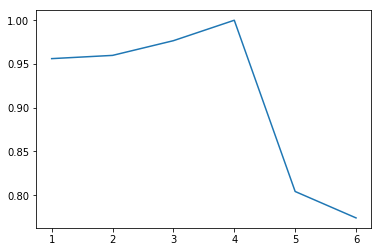

In [9]:
# Original Data
print("\nOriginal Data:\n")
acc_org = GMM(df)


for feature selection:

Q: 1 Accuracy: 0.9561253561253561
[[1537    0]
 [ 154 1819]]
Q: 2 Accuracy: 0.9598290598290599
[[1537    0]
 [ 141 1832]]
Q: 3 Accuracy: 1.0
[[1537    0]
 [   0 1973]]
Q: 4 Accuracy: 0.9250712250712251
[[1537    0]
 [ 263 1710]]
Q: 5 Accuracy: 0.9897435897435898
[[1537    0]
 [  36 1937]]
Q: 6 Accuracy: 0.8028490028490028
[[1537    0]
 [ 692 1281]]


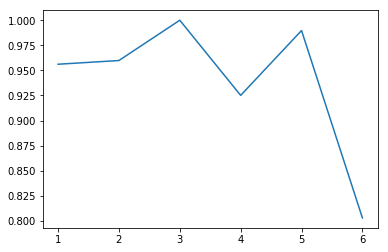

In [10]:
# Feature Selection
# Eliminating Redundant Columns i.e Columns having high value of Corelation coefficient between each other
#(corr > 0.5)
print("\nfor feature selection:\n")
acc_feat = GMM(df_fs)


Normalised:

Q: 1 Accuracy: 0.9561253561253561
[[1537    0]
 [ 154 1819]]
Q: 2 Accuracy: 0.7393162393162394
[[1537    0]
 [ 915 1058]]
Q: 3 Accuracy: 0.950997150997151
[[1428  109]
 [  63 1910]]
Q: 4 Accuracy: 0.8162393162393162
[[1467   70]
 [ 575 1398]]
Q: 5 Accuracy: 0.9740740740740741
[[1446   91]
 [   0 1973]]
Q: 6 Accuracy: 0.8276353276353277
[[1460   77]
 [ 528 1445]]


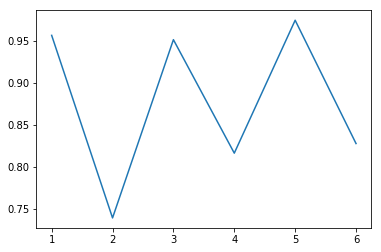

In [11]:
# Normalised Data
print("\nNormalised:\n")
acc_norm = GMM(dfmm)


Standardised:

Q: 1 Accuracy: 0.9561253561253561
[[1537    0]
 [ 154 1819]]
Q: 2 Accuracy: 0.9598290598290599
[[1537    0]
 [ 141 1832]]
Q: 3 Accuracy: 0.945014245014245
[[1344  193]
 [   0 1973]]
Q: 4 Accuracy: 0.9746438746438747
[[1528    9]
 [  80 1893]]
Q: 5 Accuracy: 0.950997150997151
[[1419  118]
 [  54 1919]]
Q: 6 Accuracy: 0.968945868945869
[[1525   12]
 [  97 1876]]


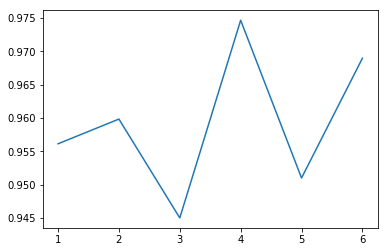

In [12]:
# Standardised Data
print("\nStandardised:\n")
acc_std = GMM(dfstd)

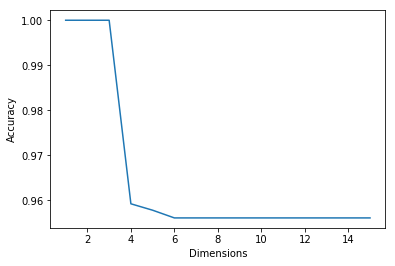

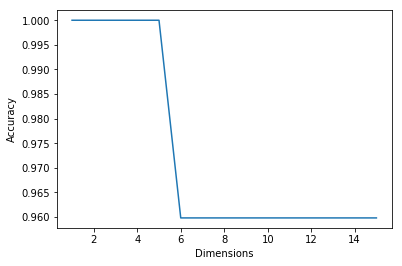

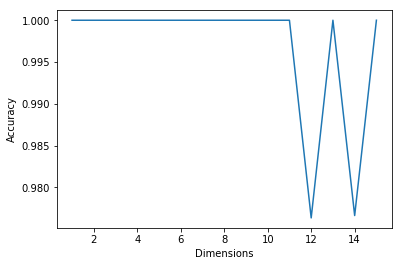

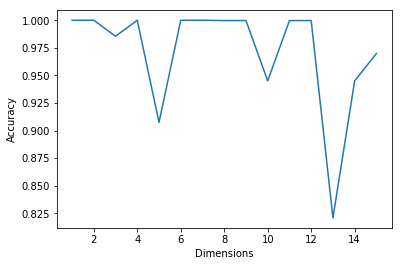

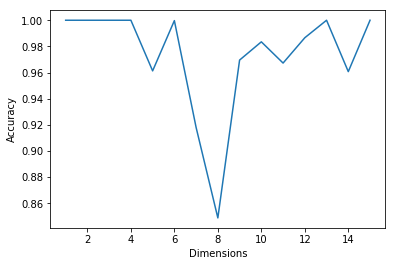

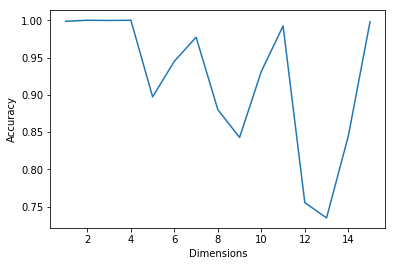

In [13]:
# PCA - Data Reduction
acc_pca = []
pcalist = [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
for i in range(1,7):
    acc_pca  = []
    for j in range(1,16):
        pcadf = dfpca
        pca = PCA(n_components=j)  # PCA 
        pcadf = pca.fit_transform(pcadf.drop(columns = ['Class']))
        pcadf = pd.DataFrame(pcadf)
        pcadf = pcadf.join(cl)  # joining the class column back
        #print("\nPCA:\n")
        acc_pca.append(GMM1(pcadf,i))
    plt.plot(pcalist,acc_pca)
    plt.xlabel("Dimensions")
    plt.ylabel("Accuracy")
    plt.show()
    

Q: 1 Accuracy: 0.4378917378917379
[[1537    0]
 [1973    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (2). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)


Q: 2 Accuracy: 0.4378917378917379
[[1537    0]
 [1973    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)


Q: 3 Accuracy: 0.4378917378917379
[[1537    0]
 [1973    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (4). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)


Q: 4 Accuracy: 0.4378917378917379
[[1537    0]
 [1973    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (5). Possibly due to duplicate points in X.
  return_n_iter=True)
/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


Q: 5 Accuracy: 0.4378917378917379
[[1537    0]
 [1973    0]]
Q: 6 Accuracy: 0.4378917378917379
[[1537    0]
 [1973    0]]


/usr/local/lib/python3.6/dist-packages/sklearn/cluster/k_means_.py:971: ConvergenceWarning: Number of distinct clusters (1) found smaller than n_clusters (6). Possibly due to duplicate points in X.
  return_n_iter=True)


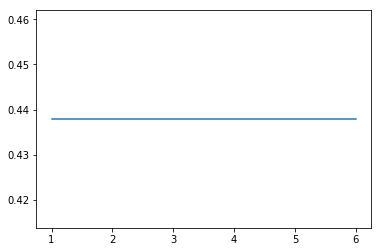

In [14]:
# Skewed Data
df_sk = df[['TOTAL HIP ANTHROPLASTY','FASCIOLOPSIASIS','TOTAL HIP REPLACEMENT','Class']]
acc_sk = GMM(df_sk)

In [16]:
from prettytable import PrettyTable
t = PrettyTable(['Data', 'Q:1(Bayesian)','Q:2','Q:3','Q:4','Q:5','Q:6','Max'])
t.add_row(['Original',acc_org[0],acc_org[1],acc_org[2],acc_org[3],acc_org[4],acc_org[5],max(acc_org)])
t.add_row(['Standard',acc_std[0],acc_std[1],acc_std[2],acc_std[3],acc_std[4],acc_std[5],max(acc_std)])
t.add_row(['Normalised',acc_norm[0],acc_norm[1],acc_norm[2],acc_norm[3],acc_norm[4],acc_norm[5],max(acc_norm)])
t.add_row(['Feature Selection',acc_feat[0],acc_feat[1],acc_feat[2],acc_feat[3],acc_feat[4],acc_feat[5],max(acc_feat)])
t.add_row(['Skewed Data',acc_sk[0],acc_sk[1],acc_sk[2],acc_sk[3],acc_sk[4],acc_sk[5],max(acc_sk)])
t.add_row(['PCA(n = 2)',acc_pca_n_2[0],acc_pca_n_2[1],acc_pca_n_2[2],acc_pca_n_2[3],acc_pca_n_2[4],acc_pca_n_2[5],max(acc_pca_n_2)])
print(t)

ModuleNotFoundError: No module named 'prettytable'